<a href="https://colab.research.google.com/github/laistebas/projeto_preco_aluguel/blob/main/projeto_preco_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans
import statsmodels.api as sm

In [ ]:
# Importar a base de dados
dataset = pd.read_csv("/content/dataset.csv")
dataset.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
# Visão geral dos arquivos
dataset.shape

(3000, 7)

In [ ]:
dataset.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [ ]:
dataset.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


**Análise Exploratória**

In [ ]:
# Verificando valores ausentes
dataset.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [ ]:
# Resumo estatistico do dataset
# Pegou todas as colunas mas nem todas são quantitativas (codigo_bairro)
# Separar variaveis qualitativas de quantitativas
dataset.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


Objetivo: explicar a variação do valor do aluguel com base no tamanho dos imóveis

In [ ]:
# Variável alvo/resposta
dataset["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

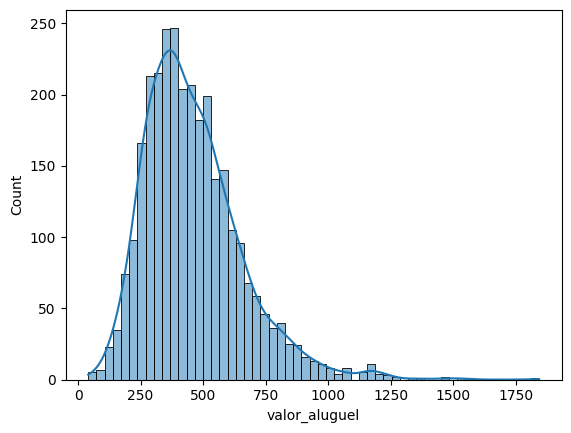

In [ ]:
# Histograma da variável alvo
ans.histplot(data= dataset, x="valor_aluguel", kde=True)
# para cada valor de aluguel tem a contagem

In [ ]:
# Coeficiente de correlação entre as variáveis
# Correlação igual a 1 = correlação linear perfeita positiva
# Correlação igual a -1 = correlação linear perfeita negativa
# Correlação igual a 0 = não há correlação linear entre duas variáveis
dataset.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

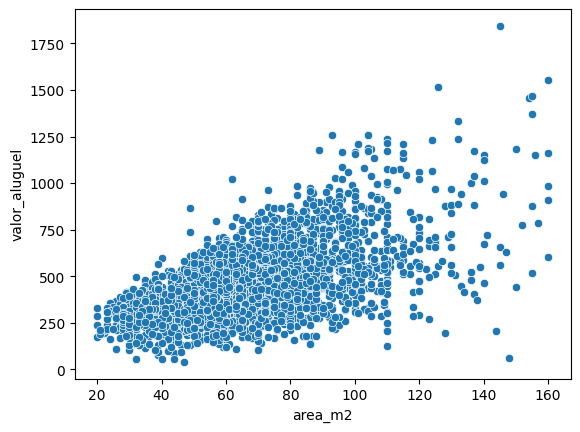

In [ ]:
# Analise da relação entre a variável de entrada area_m2 e a variável alvo valor_aluguel
ans.scatterplot(data = dataset, x = "area_m2", y = "valor_aluguel")

Houve uma correlação positiva. Conforme aumenta o m2 consequentemente aumenta o valor do aluguel. Mostrando maior densidade no começo e se dispersando no final.  

# **Regressão linear simples**

Apenas uma variável independente envolvida.
Y = a + bX + E

Modelo OLS - minimiza a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

In [ ]:
dataset.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
# Definição da variável dependente
y = dataset["valor_aluguel"]

In [ ]:
# Definição da variável independente
x = dataset["area_m2"]

In [ ]:
# Adicionando uma constante a variável independente
x = sm.add_constant(x)

In [ ]:
# Criando/ajustando o modelo
# y vem antes do x
modelo = sm.OLS(y, x)

In [ ]:
# Treinando o modelo
resultado = modelo.fit()

In [ ]:
# Resumo do relacionamento entre x e y
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          6.84e-275
Time:                        19:46:55   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

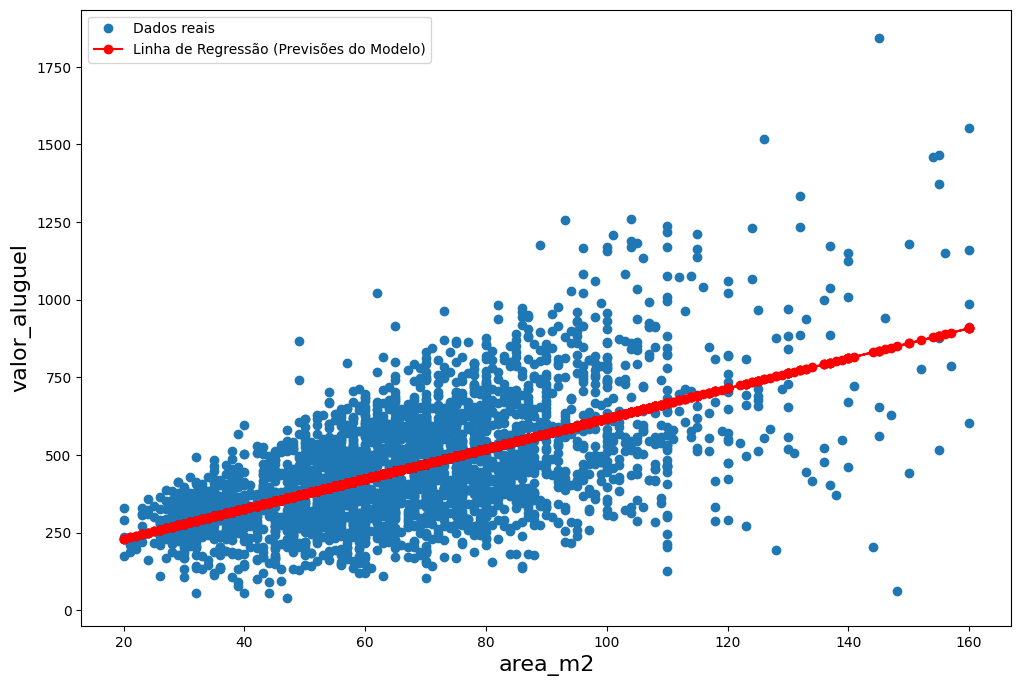

In [ ]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size = 16)
plt.plot(x["area_m2"], y, "o", label = "Dados reais")
plt.plot(x["area_m2"], resultado.fittedvalues, "ro-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

Através do gráfico acima foi comprovado que houve uma correlação positiva. Conforme aumenta o m2 consequentemente aumenta o valor do aluguel. Mostrando maior densidade no começo e se dispersando no final, sendo a linha de regressão uma reta constante.